# Branching Processes 

What are general patterns we might expect when a population grows out of a single cell?

One of the most basic question is to characterize how a population grows over time. Deterministically, we expect exponential growth if prolifertion at rate $a$ exceeds the rate $b$ of death. In many cases, both quantities are similar, for example in an epidemic situation where $R_0$ is about 1, or for a slightly beneficial mutaiton in a population going through generations. In these near critical cases, it is not obvious whether a population survives rather than goes extinct by chance and, if it survives, what population size distribution on might expect. 

## Survival probability

To answer this question, let's first focus on the probability $u(t|\tau)$ that an individual present at time $\tau$ leaves some descendants at time $t$. 

Suppose, we already know $u(t|\tau)$ and would like to estimate $u(t|\tau-\epsilon)$, i.e. pushing the initial condition further back in time. Then, if the time slice $\epsilon$ is sufficiently small, we only have to consider two possible events, birth with probability $\epsilon a$, or death with probability $\epsilon b$, as the probability of double events is of order $\epsilon^2$. Thus, we can estimate

$$ 
u(t|\tau-\epsilon)=\left[1-\epsilon (a+b)\right] u(t|\tau)+\epsilon a \left[1-(1-u(t|\tau))^2\right] 
$$  (br-process-1)

Here, the first term on the right hand side simply says that, conditional on no death or birth event occurs within the time span $\epsilon$, the probability of survival remains unchanged. 

$$ 
-\partial_\tau u = (a-b) u - a u^2. 
$$

Notice that, if the birth and death rates are time dependent, they have to be evaluated at the initial time $\tau$.
For simplicity, we assume the relative growth rate difference $s\equiv (a-b)/a\ll1$ is constant and small. 

If we further measure time in generations, $\tau\to \tau/a$, we obtain 
    
$$ 
-\partial_\tau u = s u - u^2. 
$$ (logistic-eqn)

The resulting equation {eq}`logistic-eqn` is a logistic differential equation. Although seemingly non-linear, this equation reveals its linear nature after the following substituting $u(\tau)=\frac {s }{1-q(\tau)^{-1}}$, upon which we obtain 

$$
-\partial_\tau q(\tau)=s q(\tau) \;.
$$

This linear equation for the fraction $q(t)\equiv \frac u{u-s}$ has the solution $q(\tau)=q(t)e^{s(t-\tau)}$. Using the initial condition $q(t)=\frac 1{1-s}$, we obtain for the survival probability

$$
u(t|\tau)=\frac{s}{1-(1-s)e^{s(\tau-t)}}=u(t-\tau)\;.
$$

Note, that our final result only depends on the time difference. That changes if we birth and death rates are time-dependent.

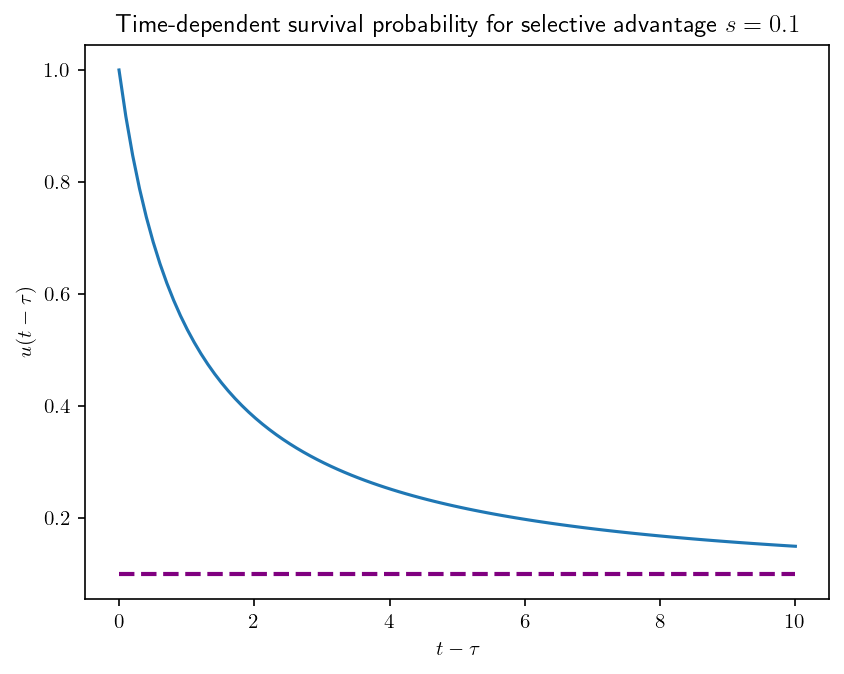

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# allow TeX
plt.rcParams['text.usetex'] = True
plt.figure(dpi=150)

s = 0.1
tmax = 10
t = np.linspace(start=0, stop=tmax, num=100)
y = s/(1-(1-s)*np.exp(-s*t)) 

# Add title and axis names
plt.title(r'Time-dependent survival probability for selective advantage $s = 0.1$')
plt.xlabel(r'$t- \tau $')
plt.ylabel(r'$u(t-\tau)$')

plt.hlines(y = s, xmin= 0 , xmax=tmax, colors='purple', linestyles='--', lw=2, label='s')

plt.plot(t, y)
plt.show()

First notice that we have a special solution $G_x^\infty\equiv G_x(t-\tau\to\infty)=(1-s)$, which simply corresponds to the fact that with probability $(1-s)$ the process goes extinct ($N(t)=0$).

Substituting $G_x(t)=G_x^\infty+g_x(t)$, we have to solve the homogeneous equation

$$
-\partial_\tau g_x = -s g_x + g_x^2
$$
subject to final condition $x=G_x(t)=g_x(t)+1-s$, i.e., $g_x(t)=s+x-1$, and the long-time limit $g_x(-\infty)=0$.

This logistic differential equation can be solved for $x\leq 1$ (indicating the radius of convergence) as above, yielding 

$$
G_x(t) = 1-s+\frac{s}{1+e^{s(t-\tau)}\frac{1-x}{s+x-1}}\;.
$$


A power series expansion returns the sought after abundance distribution, which for $\tau=0$ is given by

$$
    p_n(t)=\left\{\begin{array}{cc}
  & 
\begin{array}{cc}
 s^2 e^{s t} \left(e^{s t}-1\right)^{n-1} \left(e^{s t}+s-1\right)^{-n-1} & n\geq 1 \\
 \frac{(1-s) \left(e^{s t}-1\right)}{e^{s t}+s-1} & n=0 \\
\end{array}
 \\
\end{array}\right.
$$  (abundance-pdf)

Notice that $p_0(t)=1-u(t)$ as expected.

Since the distribution is quite broad, one would like to know some characteristic features. The mean is given by 

$$
    \langle N(t) \rangle =\partial_x|_{x=1} G_x(t)=e^{st}
$$  (mean abundance)
which again is a sanity check.

But, more interesting, is the mean given survival,

$$
    \langle N(t)|N(t)\geq1 \rangle =\frac{e^{st}}{u(t)}=1+\frac{e^{s t}-1}{s}
$$  (mean abundance)


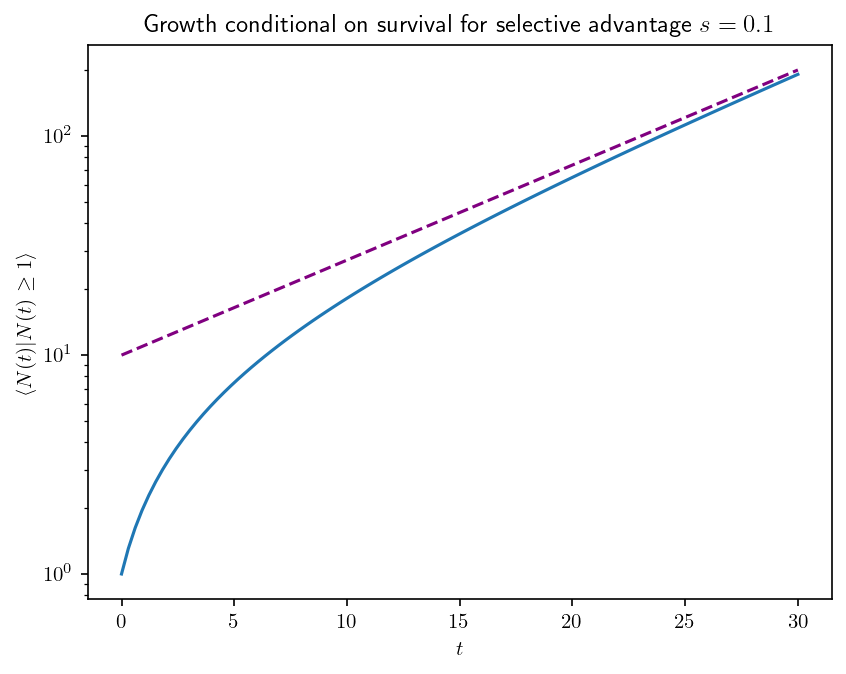

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# allow TeX
plt.rcParams['text.usetex'] = True
plt.figure(dpi=150)

s = 0.1
tmax = 30
t = np.linspace(start=0, stop=tmax, num=100)
y = 1+(np.exp(s*t)-1)/s 

yapprox = np.exp(s*t)/s 


# Add title and axis names
plt.title(r'Growth conditional on survival for selective advantage $s = 0.1$')
plt.xlabel(r'$t $')
plt.ylabel(r'$\langle N(t)|N(t)\geq1 \rangle $')

#plt.hlines(y = 1/s, xmin= 0 , xmax=tmax, colors='purple', linestyles='--', lw=2, label='s')

plt.yscale("log")

plt.plot(t, y)
plt.plot(t, yapprox, color='purple', linestyle='dashed')
plt.show()

```{note}
Given survival, the asymptotic exponential growth, $s^{-1}e^{s t}$, looks as if proliferation was accelerated in the beginning. Indeed, conditioning on surviving, the population has to initially grow much faster than exponential, namely like $1+t$ for a time $s^{-1}$, to run away from the absorbing boundary. 
```


## Citations

You can also cite references that are stored in a `bibtex` file. For example,
the following syntax: `` {cite}`holdgraf_evidence_2014` `` will render like
this: {cite}`holdgraf_evidence_2014`.

Moreover, you can insert a bibliography into your page with this syntax:
The `{bibliography}` directive must be used for all the `{cite}` roles to
render properly.
For example, if the references for your book are stored in `references.bib`,
then the bibliography is inserted with:

```{bibliography}
```